<a href="https://colab.research.google.com/github/Abhishek-xavi/DataScienceProjects/blob/main/IMDB_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
#IMPORTING LIBRARIES

import pandas as pd                                         #library to read excel
from imblearn.under_sampling import RandomUnderSampler      #Importing library to keep the sample size similar for every type of predictions
from sklearn.model_selection import train_test_split        #To divide data into train and test sets
from sklearn.feature_extraction.text import TfidfVectorizer  #To convert Review Words to text for modelling purpose. We use TF,IDF method


In [56]:
#Storing dataset in dataframe
df_review = pd.read_csv(r"/content/IMDB Dataset.csv")
print(df_review)


                                                  review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]


In [57]:
#The data frame has 50,000 rows. To train the model faster, we will split the data.
#First split will have 9000 negative and 1000 positive

df_positive = df_review[df_review['sentiment']=='positive'][:9000]
df_negative = df_review[df_review['sentiment']=='negative'][:1000]

df_review_imb = pd.concat( [df_positive, df_negative] )
print(df_review_imb)

                                                 review sentiment
0     One of the other reviewers has mentioned that ...  positive
1     A wonderful little production. <br /><br />The...  positive
2     I thought this was a wonderful way to spend ti...  positive
4     Petter Mattei's "Love in the Time of Money" is...  positive
5     Probably my all-time favorite movie, a story o...  positive
...                                                 ...       ...
2000  Stranded in Space (1972) MST3K version - a ver...  negative
2005  I happened to catch this supposed "horror" fli...  negative
2007  waste of 1h45 this nasty little film is one to...  negative
2010  Warning: This could spoil your movie. Watch it...  negative
2013  Quite what the producers of this appalling ada...  negative

[10000 rows x 2 columns]


In [58]:
#Our data is Imbalanced as there are more positives than negatives

#Calculating length of negative reviews
length_negative = len(df_review_imb[df_review_imb['sentiment']=='negative'])
#TAking only positive reviews equal to negative
df_review_positive = df_review_imb[df_review_imb['sentiment']=='positive'].sample(n=length_negative)
#Taking negative values
df_review_non_positive = df_review_imb[~(df_review_imb['sentiment']=='positive')]
#Concatanating to make a balance DataFrame
df_review_bal = pd.concat([
df_review_positive, df_review_non_positive
])
df_review_bal.reset_index(drop=True, inplace=True)
df_review_bal['sentiment'].value_counts()

positive    1000
negative    1000
Name: sentiment, dtype: int64

Usually before splitting data into train and test sets, we should clean the data. In this example, the data is already cleaned; however, real-world data is dirty, so whenever you need to clean data check the guide below to learn the best practices of data cleaning in Python.bold text

In [59]:
train, test = train_test_split( df_review_bal, test_size = 0.33, random_state = 42 )

# train_x: Independent variables (review) that will be used to train the model. Since we specified test_size = 0.33, 67% of observations from the data will be used to fit the model.
# train_y: Dependent variables (sentiment) or target label that need to be predicted by this model.
# test_x: The remaining 33% of independent variables that will be used to make predictions to test the accuracy of the model.
# test_y: Category labels that will be used to test the accuracy between actual and predicted categories.

In [60]:
train_x, train_y = train['review'], train['sentiment']
test_x, test_y = test['review'], test['sentiment']

Machine learning algorithms cannot work with raw text directly; the text must be converted into numbers. Specifically, vectors of numbers. This is called feature extraction or feature encoding.

A bag-of-words is a representation of text that describes the occurrence of words within a document. It involves two things:

1. A vocabulary of known words.
2. A measure of the presence of known words.

It is called a “bag” of words, because any information about the order or structure of words in the document is discarded. The model is only concerned with whether known words occur in the document, not where in the document.


There are multiple ways to convert words to vectors. Also this is called BAg of words

1. Vector count - where we calculate how many times a word is found in the docs. But unfotunately this becomes confusing with words like the, a, an, etc.
2. To overcome this, we have methods like TF-IDF, where we give values to words based on the number of times they occur in the doc.

We give this value by,
vector value = Total frequency / Inverse Doc frequency

IDF = log of {number of docs in your corpus divided by the number of docs in which this term appears}

Also, stop_words parameter removes all english connecting/stop words and increases our computational effeciency.

In [62]:
tfidf = TfidfVectorizer(stop_words='english')
train_x_vector = tfidf.fit_transform(train_x)
train_x_vector

<1340x20494 sparse matrix of type '<class 'numpy.float64'>'
	with 118051 stored elements in Compressed Sparse Row format>

In [63]:
#To view the Sparse matrix
pd.DataFrame.sparse.from_spmatrix(train_x_vector,
                                  index=train_x.index,
                                  columns=tfidf.get_feature_names())

,00,000,007,01,02,07,10,100,1000,100th,101,105,11,110,12,120,1242,13,134,13th,14,140,1470,15,150,157,15ft,15mins,16,16mm,16th,17,1700,177,17th,18,180,1800,1816,1888,...,zenda,zenia,zenith,zenobia,zephyr,zero,zest,zeta,zhaan,zhang,ziegler,zimbalist,zinc,zindulka,zing,zingers,zippy,ziyi,zodiac,zoey,zombi,zombie,zombies,zombiez,zomcom,zone,zoned,zoo,zoology,zoom,zooming,zooms,zorro,zucker,zwick,zzzzzzzzzzzzzzzzzz,zázvorková,æon,élan,être
81,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
915,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
1018,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
380,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.139647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
1029,0.0,0.0,0.0,0.0,0.0,0.0,0.107445,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
1294,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
860,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
1459,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.18352,0.0,0.0,0.0,0.0


In [64]:
#Converting test set as well
test_x_vector = tfidf.transform(test_x)

Model Selection
Now that we have numerical data, we can experiment with different machine learning models and evaluate their accuracy.

Since Our problem is supervised - classification problem, we use the below models,

*   SVM
*   Desicion Tree
*   Naive Bayes
*   Logistic regression





In [65]:
#SVM separates the data points on agraph. Depending on the number of features, the SVM boundary is either a line, plane or so on.
#The points near the boundary/plane are called supporting vectors and help determine the boundary.

from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(train_x_vector, train_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

After fitting svc we can predict whether a review is positive or negative with the .predict() method.

In [66]:
print(svc.predict(tfidf.transform(['A great movie'])))
print(svc.predict(tfidf.transform(['An excellent movie'])))
print(svc.predict(tfidf.transform(['I did not like this movie at all'])))

['positive']
['positive']
['negative']


In [67]:
#BAsed on various parameters we have a claassifying value and branch the tree out.

from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier()
dec_tree.fit(train_x_vector, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [68]:
#BAsed on Bayes conditional probability theorem
#https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(train_x_vector.toarray(), train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [69]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(train_x_vector, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Now we go forward to model evaluation.



In [70]:
# svc.score('Test samples', 'True labels')
print('SVM:',round(svc.score(test_x_vector, test_y),2))
print('Desicion Tree:',round(dec_tree.score(test_x_vector, test_y),2))
print('Naive Bayes:',round(gnb.score(test_x_vector.toarray(), test_y),2))
print('Logistic Regression:',round(log_reg.score(test_x_vector, test_y),2))

SVM: 0.82
Desicion Tree: 0.7
Naive Bayes: 0.6
Logistic Regression: 0.81


F1 Score
F1 Score is the weighted average of Precision and Recall. Accuracy is used when the True Positives and True negatives are more important while F1-score is used when the False Negatives and False Positives are crucial. Also, F1 takes into account how the data is distributed, so it’s useful when you have data with imbalance classes.

F1 Score = 2*(Recall * Precision) / (Recall + Precision)
F1 score reaches its best value at 1 and worst score at 0.


In [71]:
#https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9

from sklearn.metrics import f1_score

f1_score(test_y, svc.predict(test_x_vector),
         labels=['positive', 'negative'],
         average=None)

array([0.81981982, 0.81651376])

In [73]:
from sklearn.metrics import classification_report
print(classification_report(test_y, 
                            svc.predict(test_x_vector),
                            labels=['positive', 'negative']))

              precision    recall  f1-score   support

    positive       0.80      0.84      0.82       325
    negative       0.84      0.80      0.82       335

    accuracy                           0.82       660
   macro avg       0.82      0.82      0.82       660
weighted avg       0.82      0.82      0.82       660



Confusion Matrix
A confusion matrix) is a table that allows visualization of the performance of an algorithm. This table typically has two rows and two columns that report the number of false positives, false negatives, true positives, and true negatives

In [74]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(test_y, 
                            svc.predict(test_x_vector), 
                            labels=['positive', 'negative'])
print(conf_mat)

[[273  52]
 [ 68 267]]


To understand what that means check this picture below.

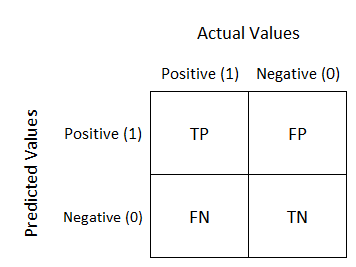

Now Let's work on Tuning the Model.
We shall work on SVC but this time we introduce hyperparameters.

In [75]:
from sklearn.model_selection import GridSearchCV

#set the parameters
parameters = {'C': [1,4,8,16,32] ,'kernel':['linear', 'rbf']}
svc = SVC()
svc_grid = GridSearchCV(svc,parameters, cv=5)

svc_grid.fit(train_x_vector, train_y)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 4, 8, 16, 32], 'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [76]:
#After fitting the model, we obtain the best score, parameters, and estimators with the following code.

print(svc_grid.best_params_)
print(svc_grid.best_estimator_)

{'C': 4, 'kernel': 'rbf'}
SVC(C=4, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
